<a href="https://colab.research.google.com/github/PeterRutkowski/fer/blob/master/paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# data split 0.7
loaded = np.load('drive/My Drive/project42/data/kdef_0.3.npz', allow_pickle=True)
x_train = tf.convert_to_tensor(np.expand_dims(loaded['x_train'], axis=3)) 
y_train = tf.convert_to_tensor(loaded['y_train'])
x_val = tf.convert_to_tensor(np.expand_dims(loaded['x_val'], axis=3)) 
y_val = tf.convert_to_tensor(loaded['y_val'])
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(687, 100, 100, 1) (687, 7) (294, 100, 100, 1) (294, 7)


In [ ]:
cnn = keras.Sequential(
  [   
    layers.Input(shape=(100,100,1,)),

    layers.Conv2D(filters=20, kernel_size=(5,5), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=40, kernel_size=(5,5), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    layers.Conv2D(filters=60, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(filters=30, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
   
    layers.Flatten(),
   
    layers.Dense(100),
    layers.BatchNormalization(),
    layers.Activation('relu'),
   
    layers.Dense(7, activation='softmax'),
  ]
)

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 20)      520       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 20)      80        
_________________________________________________________________
activation (Activation)      (None, 100, 100, 20)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 40)        20040     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 40)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 40)        0

In [ ]:
initial_learning_rate = 0.1
decay_rate = 0.01
decay_steps = 1.0
n_epochs = 500
batch_size = 32

learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate, decay_steps, decay_rate)

#cnn.compile(optimizer=keras.optimizers.SGD(
#                  learning_rate=learning_rate_fn), loss='categorical_crossentropy', metrics=['accuracy'])

cnn.compile(optimizer=keras.optimizers.Adam(
                  learning_rate=learning_rate_fn), loss='categorical_crossentropy', metrics=['accuracy'])


filepath = 'drive/My Drive/project42/models/cnn_batch{}_adam.h5'.format(batch_size)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

cnn.fit(x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=1,
    callbacks=callbacks_list,
    validation_data=(x_val,y_val),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,)

Epoch 1/500
22/22 [==============================] - ETA: 0s - loss: 2.0236 - accuracy: 0.3785
Epoch 00001: val_accuracy improved from -inf to 0.14966, saving model to drive/My Drive/project42/models/cnn_batch32_adam.h5
22/22 [==============================] - 1s 60ms/step - loss: 2.0236 - accuracy: 0.3785 - val_loss: 1318.8282 - val_accuracy: 0.1497
Epoch 2/500
22/22 [==============================] - ETA: 0s - loss: 0.9924 - accuracy: 0.6114
Epoch 00002: val_accuracy improved from 0.14966 to 0.30272, saving model to drive/My Drive/project42/models/cnn_batch32_adam.h5
22/22 [==============================] - 1s 34ms/step - loss: 0.9924 - accuracy: 0.6114 - val_loss: 39.9234 - val_accuracy: 0.3027
Epoch 3/500
22/22 [==============================] - ETA: 0s - loss: 0.8285 - accuracy: 0.6827
Epoch 00003: val_accuracy did not improve from 0.30272
22/22 [==============================] - 1s 28ms/step - loss: 0.8285 - accuracy: 0.6827 - val_loss: 42.3755 - val_accuracy: 0.1735
Epoch 4/500


tf.Tensor([1 0 0 0 0 0 0], shape=(7,), dtype=int64) [[0.04 0.   0.   0.   0.   0.95 0.  ]]


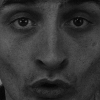

tf.Tensor([0 0 0 1 0 0 0], shape=(7,), dtype=int64) [[0.02 0.   0.   0.33 0.   0.65 0.  ]]


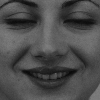

tf.Tensor([0 1 0 0 0 0 0], shape=(7,), dtype=int64) [[0.   0.29 0.71 0.   0.   0.   0.  ]]


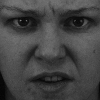

tf.Tensor([0 0 0 0 0 0 1], shape=(7,), dtype=int64) [[0.94 0.   0.   0.   0.   0.   0.06]]


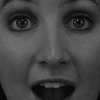

tf.Tensor([1 0 0 0 0 0 0], shape=(7,), dtype=int64) [[0.01 0.   0.   0.   0.96 0.   0.03]]


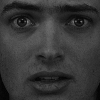

tf.Tensor([0 0 0 0 0 0 1], shape=(7,), dtype=int64) [[0.  0.  0.  0.  0.5 0.  0.5]]


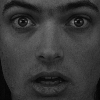

tf.Tensor([0 0 1 0 0 0 0], shape=(7,), dtype=int64) [[0.   0.98 0.02 0.   0.   0.   0.  ]]


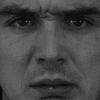

tf.Tensor([1 0 0 0 0 0 0], shape=(7,), dtype=int64) [[0.01 0.   0.   0.   0.99 0.   0.  ]]


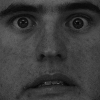

tf.Tensor([0 0 0 0 0 1 0], shape=(7,), dtype=int64) [[0. 0. 1. 0. 0. 0. 0.]]


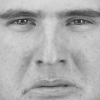

tf.Tensor([0 0 1 0 0 0 0], shape=(7,), dtype=int64) [[0.   0.   0.04 0.   0.   0.96 0.  ]]


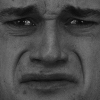

tf.Tensor([0 0 0 0 0 1 0], shape=(7,), dtype=int64) [[0.02 0.   0.   0.   0.97 0.01 0.  ]]


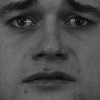

tf.Tensor([1 0 0 0 0 0 0], shape=(7,), dtype=int64) [[0. 0. 0. 0. 0. 1. 0.]]


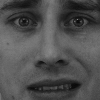

tf.Tensor([0 0 0 0 0 1 0], shape=(7,), dtype=int64) [[0. 0. 0. 0. 1. 0. 0.]]


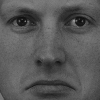

tf.Tensor([1 0 0 0 0 0 0], shape=(7,), dtype=int64) [[0. 0. 0. 0. 0. 1. 0.]]


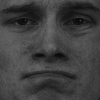

tf.Tensor([0 0 0 0 0 1 0], shape=(7,), dtype=int64) [[0.99 0.   0.   0.   0.   0.   0.01]]


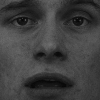

tf.Tensor([0 1 0 0 0 0 0], shape=(7,), dtype=int64) [[0.   0.32 0.68 0.   0.   0.   0.  ]]


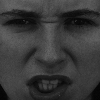

tf.Tensor([0 0 0 0 0 1 0], shape=(7,), dtype=int64) [[0.61 0.   0.   0.   0.   0.39 0.  ]]


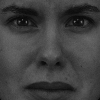

tf.Tensor([0 0 0 0 0 1 0], shape=(7,), dtype=int64) [[0. 0. 1. 0. 0. 0. 0.]]


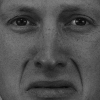

tf.Tensor([0 0 1 0 0 0 0], shape=(7,), dtype=int64) [[0.   0.   0.02 0.   0.   0.98 0.  ]]


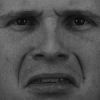

tf.Tensor([1 0 0 0 0 0 0], shape=(7,), dtype=int64) [[0.01 0.   0.   0.   0.   0.99 0.  ]]


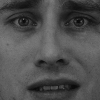

tf.Tensor([0 0 0 0 0 1 0], shape=(7,), dtype=int64) [[0.   0.57 0.43 0.   0.   0.   0.  ]]


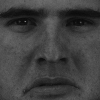

tf.Tensor([1 0 0 0 0 0 0], shape=(7,), dtype=int64) [[0.17 0.   0.   0.   0.   0.   0.83]]


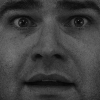

tf.Tensor([0 0 0 0 0 0 1], shape=(7,), dtype=int64) [[0.   0.   0.   0.   0.98 0.   0.02]]


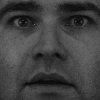

tf.Tensor([0 0 0 0 0 0 1], shape=(7,), dtype=int64) [[0.92 0.   0.   0.   0.   0.   0.08]]


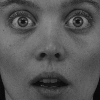

tf.Tensor([0 1 0 0 0 0 0], shape=(7,), dtype=int64) [[0. 0. 1. 0. 0. 0. 0.]]


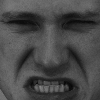

In [ ]:
cnn = load_model('drive/My Drive/project42/models/cnn_batch32_adam_91.837.h5')

for i in range(len(x_val)):
  c = np.expand_dims(x_val[i], axis=0)
  if np.argmax(y_val[i]) != np.argmax(np.round(cnn.predict(c),2)):
    print(y_val[i], np.round(cnn.predict(c),2))
    cv2_imshow(np.asarray(x_val[i]))